#use gpu

In [1]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 30.00 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [2]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 352.6 MB 13 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=7acc70fe95cd80d397f8236f25c65d5551a84e86553f2c8293b6801ae97a5601
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-pnhmdbty/pycocotools_bb3f94bbc8b5421783480b52adf68e86
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-pnhmdbty/pycocotools_bb3f94bbc8b5421783480b52adf68e86
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263847 sha256=36b3f4861e8577b026bc5f09c1009e52934cfe1415cbe6730885b55f148227b8
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [3]:
#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

     \ 91 kB 550 kB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47878 sha256=b4afb0663e12ed93b40dfa9c7a7bb657fa73f89df893ed9079fae90cf77cc03f
  Stored in directory: /tmp/pip-ephem-wheel-cache-126s52jc/wheels/b5/36/d9/593e7ac06d343d0a32138fa6c402dc3a0bd31442c9fe53f76c
Successfully built tqdm
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.28.1 which is incompatible.
panel 0.12.1 requires tqdm>=4.48.0, but you have tqdm 4.28.1 which is incompatible.
fbprophet 0.7.1 requires tqdm>=4.36.1, but you have tqdm 4.28.1 which is incompatible.
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl

###get data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##train

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from train_detector import Detector

In [ ]:
gtf = Detector();

In [ ]:
#directs the model towards file structure
root_dir = "/content/drive/MyDrive/UAV/Model/efficientdet_data/efficientdet";
coco_dir = "coco";
img_dir = "images";
set_dir = "train2017";

In [ ]:
#smells like some free compute from Colab, nice
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=320, use_gpu=True)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [ ]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [ ]:
gtf.Train(num_epochs=100, model_output_dir="/content/drive/MyDrive/Colab Notebooks/");

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


KeyboardInterrupt: ignored

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="/content/drive/MyDrive/UAV/Model/")

In [ ]:
#extract class list from our annotations
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = ['person']

In [ ]:

test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

In [ ]:
from IPython.display import Image
Image(filename='output.jpg') 

#resume

change code /4_efficientdet/lib/train_detector from
(if there's parameter error, then "restart" runtime, not reset) 
(copy&paste and tap 1 time)

      def Model(self,gpu_devices=[0]):
              num_classes = self.system_dict["local"]["training_set"].num_classes();
              efficientdet = EfficientDet(num_classes=num_classes)

              if self.system_dict["params"]["use_gpu"]:
                  self.system_dict["params"]["gpu_devices"] = gpu_devices
                  if len(self.system_dict["params"]["gpu_devices"])==1:
                      os.environ["CUDA_VISIBLE_DEVICES"] = str(self.system_dict["params"]["gpu_devices"][0])
                  else:
                      os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(id) for id in self.system_dict["params"]["gpu_devices"]])
                  self.system_dict["local"]["device"] = 'cuda' if torch.cuda.is_available() else 'cpu'
                  efficientdet = efficientdet.to(self.system_dict["local"]["device"])
                  efficientdet= torch.nn.DataParallel(efficientdet).to(self.system_dict["local"]["device"])

              self.system_dict["local"]["model"] = efficientdet;
              self.system_dict["local"]["model"].train();

to

      def Model(self, model_name="efficientnet-b0", gpu_devices=[0], load_pretrained_model_from=None):
        '''
        User function: Set Model parameters
        Args:
            gpu_devices (list): List of GPU Device IDs to be used in training
        Returns:
            None
        '''
        if(not load_pretrained_model_from):
            num_classes = self.system_dict["local"]["training_set"].num_classes();
            coeff = int(model_name[-1])
            efficientdet = EfficientDet(num_classes=num_classes, compound_coef=coeff, model_name=model_name);

            if self.system_dict["params"]["use_gpu"]:
                self.system_dict["params"]["gpu_devices"] = gpu_devices
                if len(self.system_dict["params"]["gpu_devices"])==1:
                    os.environ["CUDA_VISIBLE_DEVICES"] = str(self.system_dict["params"]["gpu_devices"][0])
                else:
                    os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(id) for id in self.system_dict["params"]["gpu_devices"]])
                self.system_dict["local"]["device"] = 'cuda' if torch.cuda.is_available() else 'cpu'
                efficientdet = efficientdet.to(self.system_dict["local"]["device"])
                efficientdet= torch.nn.DataParallel(efficientdet).to(self.system_dict["local"]["device"])

            self.system_dict["local"]["model"] = efficientdet;
            self.system_dict["local"]["model"].train();
        else:
            efficientdet = torch.load(load_pretrained_model_from).module
            if self.system_dict["params"]["use_gpu"]:
                self.system_dict["params"]["gpu_devices"] = gpu_devices
                if len(self.system_dict["params"]["gpu_devices"])==1:
                    os.environ["CUDA_VISIBLE_DEVICES"] = str(self.system_dict["params"]["gpu_devices"][0])
                else:
                    os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(id) for id in self.system_dict["params"]["gpu_devices"]])
                self.system_dict["local"]["device"] = 'cuda' if torch.cuda.is_available() else 'cpu'
                efficientdet = efficientdet.to(self.system_dict["local"]["device"])
                efficientdet= torch.nn.DataParallel(efficientdet).to(self.system_dict["local"]["device"])
            
            self.system_dict["local"]["model"] = efficientdet;
            self.system_dict["local"]["model"].train();

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from train_detector import Detector

In [ ]:
gtf=Detector()

NameError: ignored

In [ ]:
root_dir = "/content/drive/MyDrive/UAV/Model/efficientdet_data/efficientdet";
coco_dir = "coco";
img_dir = "images";
set_dir = "train2017";

In [ ]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=320, use_gpu=True)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
gtf.Model(load_pretrained_model_from="/content/drive/MyDrive/Colab Notebooks/trained/signatrix_efficientdet_coco.pth")

TypeError: ignored

In [ ]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

#make "new" folder for save trained model
if you start training, the saved folder will be all deleted

In [ ]:
gtf.Train(num_epochs=7, model_output_dir="/content/drive/MyDrive/Colab Notebooks/trained/retrained");

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  if len(inputs) == 2:
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  image_shape = np.array(image_shape)
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might caus

#reload

In [ ]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 22.05 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [ ]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

     |████████████████████████████████| 352.6 MB 13 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=5d05ff26497f5f88eabaae96fd51facc39df4de3c40e2b708a6ef3b767156abb
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-drkc5btp/pycocotools_376d40c9857e4b57af958bdd6994e456
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-drkc5btp/pycocotools_376d40c9857e4b57af958bdd6994e456
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263853 sha256=0865c872e63bb65960be528738451791178a12dcc434e75206e024f6fb91b5f9
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [ ]:
#recover trained weights
!mkdir '/trained'
!cp '/content/drive/MyDrive/UAV/Model/efficientdet_data/efficientdet_outputs/efficientDet_output_checkpoints/trained/retrained/signatrix_efficientdet_coco.onnx' '/trained/signatrix_efficientdet_coco.onnx'
!cp '/content/drive/MyDrive/UAV/Model/efficientdet_data/efficientdet_outputs/efficientDet_output_checkpoints/trained/retrained/signatrix_efficientdet_coco.pth' '/trained/signatrix_efficientdet_coco.pth'

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer
gtf = Infer();

In [ ]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="/trained")

In [ ]:
#extract class list from our annotations
import json
with open('/content/drive/MyDrive/UAV/Model/efficientdet_data/efficientdet/coco/annotations/instances_train2017.json') as json_file:
    data = json.load(json_file)
class_list = ['person']

In [ ]:
%%time
#bang!
img_path = "/content/drive/MyDrive/UAV/Model/efficientdet_data/efficientdet/coco/images/train2017/001.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.220s)
CPU times: user 201 ms, sys: 43.1 ms, total: 244 ms
Wall time: 284 ms


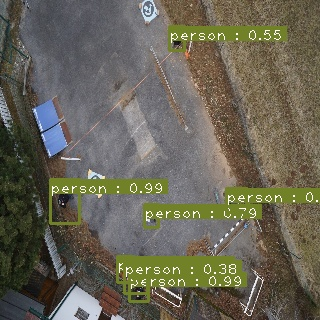

In [ ]:
from IPython.display import Image
Image(filename='output.jpg') 

Done. (0.214s)


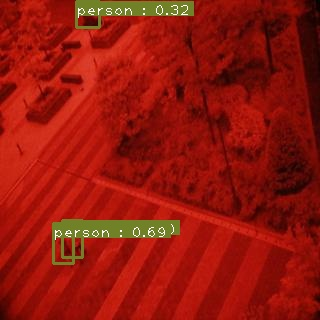

In [ ]:
img_path = "/content/drive/MyDrive/UAV/Model/efficientdet_data/efficientdet/coco/images/train2017/669.JPG";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
Image(filename='output.jpg') 

Done. (0.191s)


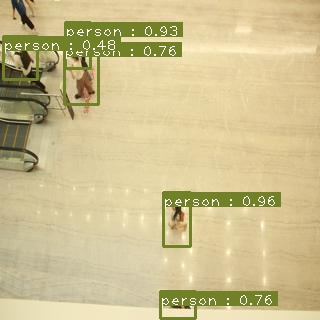

In [ ]:
img_path = "/content/drive/MyDrive/UAV/Model/efficientdet_data/efficientdet/coco/images/train2017/491.JPG";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
Image(filename='output.jpg') 

Done. (0.213s)


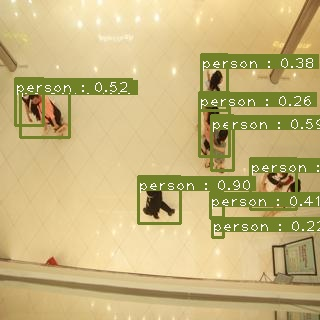

In [ ]:
img_path = "/content/drive/MyDrive/UAV/Model/efficientdet_data/efficientdet/coco/images/train2017/477.JPG";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
Image(filename='output.jpg') 

#result

In [ ]:
import tensorflow as tf

tf.__version__

'2.7.0'

In [ ]:
import tensorboard

tensorboard.__version__

'2.7.0'

In [5]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu111 (CPU)


In [6]:
%pip install -q wandb
import wandb
wandb.login()

     |████████████████████████████████| 1.7 MB 2.0 MB/s 
     |████████████████████████████████| 180 kB 54.7 MB/s 
     |████████████████████████████████| 139 kB 55.5 MB/s 
     |████████████████████████████████| 97 kB 7.3 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [7]:
wandb.init(project="efficientDet", entity="yjk__")

wandb: Currently logged in as: yjk__ (use `wandb login --relogin` to force relogin)


In [8]:
wandb.config = {
  "learning_rate": 0.0001,
  "epochs": 150,
  "batch_size": 8
}